<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agrupar Archivos.csv para tener nuestro dataframe completo**

In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('/content/test.csv')
df_test = pd.read_csv('/content/train.csv')
df_gender = pd.read_csv('/content/gender_submission.csv')

In [ ]:
print('df_train: ',df_train.shape)
print('df_gender: ',df_gender.shape)

df_train:  (418, 11)
df_gender:  (418, 2)


In [ ]:
df_train.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [ ]:
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_train.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df_gender.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [ ]:
df_gender.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [ ]:
df_gender.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [ ]:
df_training = pd.merge(df_train,df_gender, on='PassengerId')

In [ ]:
df_training.shape

(418, 12)

In [ ]:
df_training.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [ ]:
df_training.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [ ]:
df_test.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_training.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1


In [ ]:
print('df_training: ',df_training.shape)
print('df_test: ',df_test.shape)

df_training:  (418, 12)
df_test:  (891, 12)


In [ ]:
df_total= pd.concat([df_training,df_test], axis=0)

In [ ]:
df_total.shape

(1309, 12)

In [ ]:
df_total.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0


In [ ]:
df_total.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
dtype: int64

In [ ]:
df_total.to_csv('titanic.csv')

# **Regresión Logística para predecir Sobrevivientes del Titanic**

# Limpieza de datos

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/titanic.csv', index_col=0)

In [ ]:
df.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [ ]:
print('(Filas, Columnas) = ',df.shape)
print('Tamaño del dataframe: ',df.size)
print('Nombre de las columnas: ')
list(df.columns)

(Filas, Columnas) =  (1309, 12)
Tamaño del dataframe:  15708
Nombre de las columnas: 


['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

In [ ]:
#Datos faltantes:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
dtype: int64

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean(skipna = True))

In [ ]:
#Datos faltantes ajustado Age:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
dtype: int64

In [ ]:
df = df.drop(['Cabin'],axis=1)

In [ ]:
#Datos faltantes eliminado Cabin:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
Survived       0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
#Datos faltantes eliminado NA en Fare y Embarked:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [ ]:
#Revisamos las variables
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0


In [ ]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Survived         int64
dtype: object

No nos interesa para la predicción:
- El nombre del pasajero
- El ID del pasajero
- El número de ticket

In [ ]:
#Eliminamos Name, PassengerId y Ticket
df = df.drop(['PassengerId'],axis=1)
df = df.drop(['Name'],axis=1)
df = df.drop(['Ticket'],axis=1)

In [ ]:
#Convertimos la variable Pclass a object para poder hacerla Dummy
df['Pclass'] = df['Pclass'].astype('object')

# Separar dataframe en Train y Test

In [ ]:
#Importamos librería para separar set de datos
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Pasamos las variables categóricas a dummies
df_categoricas = df.select_dtypes(include=['object'])
df_dummies = pd.get_dummies(df_categoricas, drop_first=True)
df_dummies.head(3)

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,1,1,0
1,0,1,0,0,1
2,1,0,1,1,0


In [ ]:
#Seleccionamos las variables numéricas del set de datos:
df_numericas = df.select_dtypes(include=['float64','int64'])

In [ ]:
#Agrupas variables numéricas con dummies
df_final = pd.concat([df_numericas, df_dummies], axis=1)

In [ ]:
#Definimos X e Y
X = df_final.drop(['Survived'], axis=1)
Y = df_final['Survived']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Regresión Logística

In [ ]:
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [ ]:
#Instanciar modelo
rlog = LogisticRegression()

In [ ]:
#Entrenamiento
rlog.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#Predecimos los valores de Y en el set de testeo
Y_pred = rlog.predict(X_test)

In [ ]:
#Accuracy del modelo:
print('Accuracy: ',rlog.score(X_test,Y_test).round(5)*100,'%')

Accuracy:  84.733 %


# Interpretación del modelo

In [ ]:
#Intercepto del modelo
rlog.intercept_

array([3.70374847])

In [ ]:
#Coeficientes del modelo
pd.DataFrame(rlog.coef_[0], X.columns,
            columns=['coeficiente'])

,coeficiente
Age,-0.027689
SibSp,-0.236466
Parch,-0.192187
Fare,0.003268
Pclass_2,-0.725255
Pclass_3,-1.473023
Sex_male,-3.558106
Embarked_Q,-0.033577
Embarked_S,-0.361897


Se aprecia que las variables numéricas no generan coeficientes tan "fuertes" para predecir el modelo.
Sin embargo las variables asocaidas al género y la clase del pasajero afectan fuertemente al modelo.

# **Matriz de Confusión**

In [ ]:
#Importamos librería para Matriz de confusión
from sklearn.metrics import confusion_matrix

In [ ]:
matriz = confusion_matrix(Y_test, Y_pred, )
print(matriz)

[[135  17]
 [ 23  87]]


In [ ]:
#pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

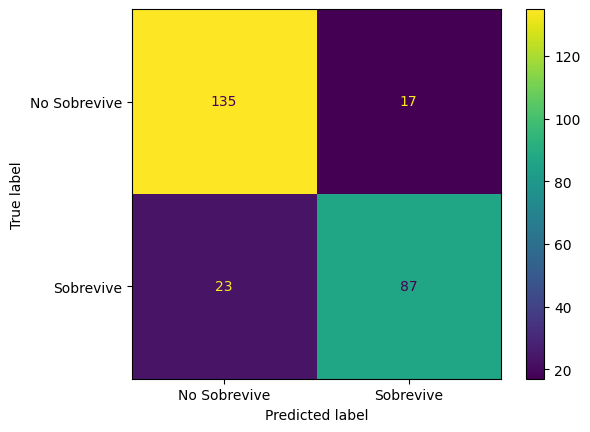

In [ ]:
#Graficamos matriz de confusion
class_names = ['No Sobrevive', 'Sobrevive']

disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=class_names)
disp.plot()

# Precision, Recall y F-Score

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
#Accuracy = TP+TN / P+N
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy: ',accuracy.round(2),'%')

Accuracy:  84.73 %


In [ ]:
#Precision = TP / TP+FP
precision = precision_score(Y_test, Y_pred)*100
print('Precision: ',precision.round(2),'%')

Precision:  83.65 %


In [ ]:
#Recall o Sensitivity = TP / TP+FN
recall = recall_score(Y_test, Y_pred)*100
print('Sensitivity: ',recall.round(2),'%')

Sensitivity:  79.09 %


In [ ]:
#F-Score = 2 * (Precision*Recall) / (Precision + Recall)
fscore = f1_score(Y_test, Y_pred)*100
print('F-Score: ',fscore.round(2),'%')

F-Score:  81.31 %
